# Business Problem Understanding                                     

Dream Housing finance company deals with all kind of home loans. They have presence across all urban, semi urban and rural areas
Customer first applies for home loan and after that company validates the customer eligibility for the loan.

Company wants to automate the loan eligibility process (Real Time) based on the customer details provided while filling the online application form.

The details are Gender,Martial Status,Education,Number of dependents,Income,Loan Amount,Credit History, and other details, to automate this process, they have provided a dataset to identify the customers segments that are eligible for the loan amount so that they can specifically target these customers.

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [2]:
data=pd.read_csv('loan_data_set.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
# Lets check the column name present in the data set 
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Understanding 

- Loan_ID : Unique Loan ID 
- Gender : Male/Female
- Married : Applicant married 
- Dependents: Number of dependents
- Education : Applicant Education
- Self_Employed : whether the applicant is self employed 
- Applicantincome : Aplicant income
- CoapplicantIncome : coapplicant income 
- Loanamount : Loan amount in thousands 
- Loan_Amount_Terms : Term of loan in months 
- Credit_History : credit history meets guidelines
- Property_Area : Urban/Semi Urban/Rural
- Loan_Status : Loan approved target variable

In [6]:
data['Loan_ID'].unique()

array(['LP001002', 'LP001003', 'LP001005', 'LP001006', 'LP001008',
       'LP001011', 'LP001013', 'LP001014', 'LP001018', 'LP001020',
       'LP001024', 'LP001027', 'LP001028', 'LP001029', 'LP001030',
       'LP001032', 'LP001034', 'LP001036', 'LP001038', 'LP001041',
       'LP001043', 'LP001046', 'LP001047', 'LP001050', 'LP001052',
       'LP001066', 'LP001068', 'LP001073', 'LP001086', 'LP001087',
       'LP001091', 'LP001095', 'LP001097', 'LP001098', 'LP001100',
       'LP001106', 'LP001109', 'LP001112', 'LP001114', 'LP001116',
       'LP001119', 'LP001120', 'LP001123', 'LP001131', 'LP001136',
       'LP001137', 'LP001138', 'LP001144', 'LP001146', 'LP001151',
       'LP001155', 'LP001157', 'LP001164', 'LP001179', 'LP001186',
       'LP001194', 'LP001195', 'LP001197', 'LP001198', 'LP001199',
       'LP001205', 'LP001206', 'LP001207', 'LP001213', 'LP001222',
       'LP001225', 'LP001228', 'LP001233', 'LP001238', 'LP001241',
       'LP001243', 'LP001245', 'LP001248', 'LP001250', 'LP0012

In [7]:
data.drop(columns=['Loan_ID'],inplace=True)

In [8]:
data['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [9]:
data['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [10]:
data['Married'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
data['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [12]:
data['Dependents'].unique() #No of dependents is (number of) has it should be discreet but it is in string format hence the data should be modified


array(['0', '1', '2', '3+', nan], dtype=object)

In [13]:
data['Dependents'].value_counts() #There is a wrong value as 3+ This has to be modified 

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [14]:
data['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [15]:
data['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [16]:
data['Self_Employed'].unique()

array(['No', 'Yes', nan], dtype=object)

In [17]:
data['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [18]:
data['ApplicantIncome'].unique()

array([ 5849,  4583,  3000,  2583,  6000,  5417,  2333,  3036,  4006,
       12841,  3200,  2500,  3073,  1853,  1299,  4950,  3596,  3510,
        4887,  2600,  7660,  5955,  3365,  3717,  9560,  2799,  4226,
        1442,  3750,  4166,  3167,  4692,  3500, 12500,  2275,  1828,
        3667,  3748,  3600,  1800,  2400,  3941,  4695,  3410,  5649,
        5821,  2645,  4000,  1928,  3086,  4230,  4616, 11500,  2708,
        2132,  3366,  8080,  3357,  3029,  2609,  4945,  5726, 10750,
        7100,  4300,  3208,  1875,  4755,  5266,  1000,  3333,  3846,
        2395,  1378,  3988,  2366,  8566,  5695,  2958,  6250,  3273,
        4133,  3620,  6782,  2484,  1977,  4188,  1759,  4288,  4843,
       13650,  4652,  3816,  3052, 11417,  7333,  3800,  2071,  5316,
        2929,  3572,  7451,  5050, 14583,  2214,  5568, 10408,  5667,
        2137,  2957,  3692, 23803,  3865, 10513,  6080, 20166,  2014,
        2718,  3459,  4895,  3316, 14999,  4200,  5042,  6950,  2698,
       11757,  2330,

In [19]:
data['CoapplicantIncome'].unique()

array([0.00000000e+00, 1.50800000e+03, 2.35800000e+03, 4.19600000e+03,
       1.51600000e+03, 2.50400000e+03, 1.52600000e+03, 1.09680000e+04,
       7.00000000e+02, 1.84000000e+03, 8.10600000e+03, 2.84000000e+03,
       1.08600000e+03, 3.50000000e+03, 5.62500000e+03, 1.91100000e+03,
       1.91700000e+03, 2.92500000e+03, 2.25300000e+03, 1.04000000e+03,
       2.08300000e+03, 3.36900000e+03, 1.66700000e+03, 3.00000000e+03,
       2.06700000e+03, 1.33000000e+03, 1.45900000e+03, 7.21000000e+03,
       1.66800000e+03, 1.21300000e+03, 2.33600000e+03, 3.44000000e+03,
       2.27500000e+03, 1.64400000e+03, 1.16700000e+03, 1.59100000e+03,
       2.20000000e+03, 2.25000000e+03, 2.85900000e+03, 3.79600000e+03,
       3.44900000e+03, 4.59500000e+03, 2.25400000e+03, 3.06600000e+03,
       1.87500000e+03, 1.77400000e+03, 4.75000000e+03, 3.02200000e+03,
       4.00000000e+03, 2.16600000e+03, 1.88100000e+03, 2.53100000e+03,
       2.00000000e+03, 2.11800000e+03, 4.16700000e+03, 2.90000000e+03,
      

In [20]:
data['LoanAmount'].unique()

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 349.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 315.,
       116., 112., 151., 191., 122., 110.,  35., 201.,  74., 106., 320.,
       144., 184.,  80.,  47.,  75., 134.,  96.,  88.,  44., 286.,  97.,
       135., 180.,  99., 165., 258., 126., 312., 136., 172.,  81., 187.,
       113., 176., 130., 111., 167., 265.,  50., 210., 175., 131., 188.,
        25., 137., 160., 225., 216.,  94., 139., 152., 118., 185., 154.,
        85., 259., 194.,  93., 370., 182., 650., 102., 290.,  84., 242.,
       129.,  30., 244., 600., 255.,  98., 275., 121.,  63., 700.,  87.,
       101., 495.,  67.,  73., 260., 108.,  58.,  48., 164., 170.,  83.,
        90., 166., 124.,  55.,  59., 127., 214., 240.,  72.,  60., 138.,
        42., 280., 140., 155., 123., 279., 192., 304., 330., 150., 207.,
       436.,  78.,  54.,  89., 143., 105., 132., 480.,  56., 159., 300.,
       376., 117.,  71., 490., 173.,  46., 228., 30

In [21]:
data['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [22]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [23]:
data["Credit_History"].unique()

array([ 1.,  0., nan])

In [24]:
data["Credit_History"]= data["Credit_History"].replace({1:"Good",0:"Bad"})

In [25]:
data["Credit_History"].unique()

array(['Good', 'Bad', nan], dtype=object)

In [26]:
data["Credit_History"].value_counts()

Good    475
Bad      89
Name: Credit_History, dtype: int64

In [27]:
data["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [28]:
data["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [29]:
data["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [30]:
data["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
continous = ["ApplicantIncome","CoapplicantIncome","LoanAmount"]

Discrete_categorical =["Gender","Married","Education","Self_Employed","Credit_History","Property_Area","Loan_Status"]

Discrete_count =["Dependents","CoapplicantIncome"]

# Exploratory Data Analysis (EDA)

## For continous variable 

In [32]:
data[continous].describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount
count,614.000000,614.000000,592.000000
mean,5403.459283,1621.245798,146.412162
std,6109.041673,2926.248369,85.587325
min,150.000000,0.000000,9.000000
25%,2877.500000,0.000000,100.000000
50%,3812.500000,1188.500000,128.000000
75%,5795.000000,2297.250000,168.000000
max,81000.000000,41667.000000,700.000000


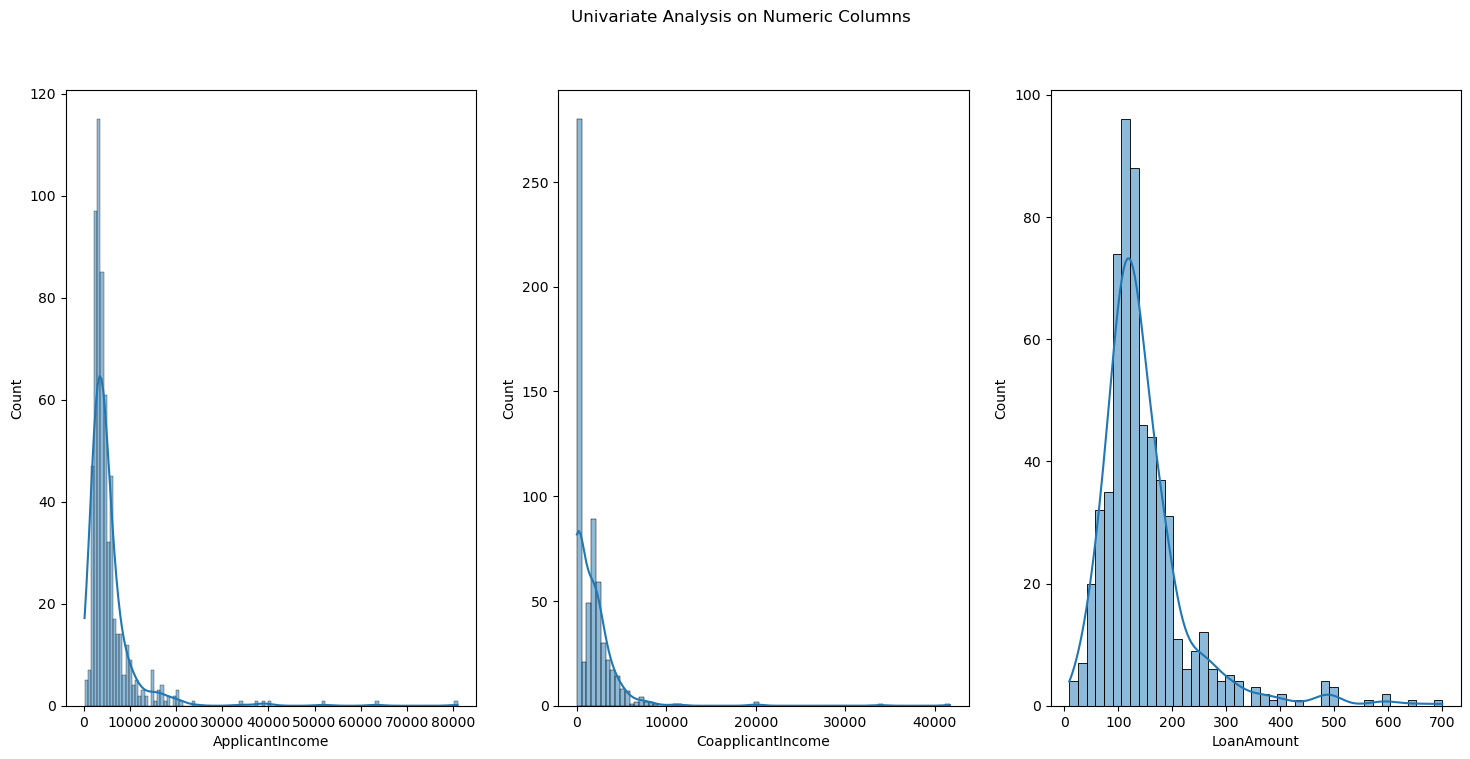

In [33]:
plt.rcParams["figure.figsize"] =(18,8)

plt.subplot(1,3,1)
sns.histplot(data["ApplicantIncome"],kde=True)

plt.subplot(1,3,2)
sns.histplot(data["CoapplicantIncome"],kde=True)

plt.subplot(1,3,3)
sns.histplot(data["LoanAmount"],kde=True)

plt.suptitle("Univariate Analysis on Numeric Columns")

plt.show()


In [34]:
data[continous].skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
dtype: float64

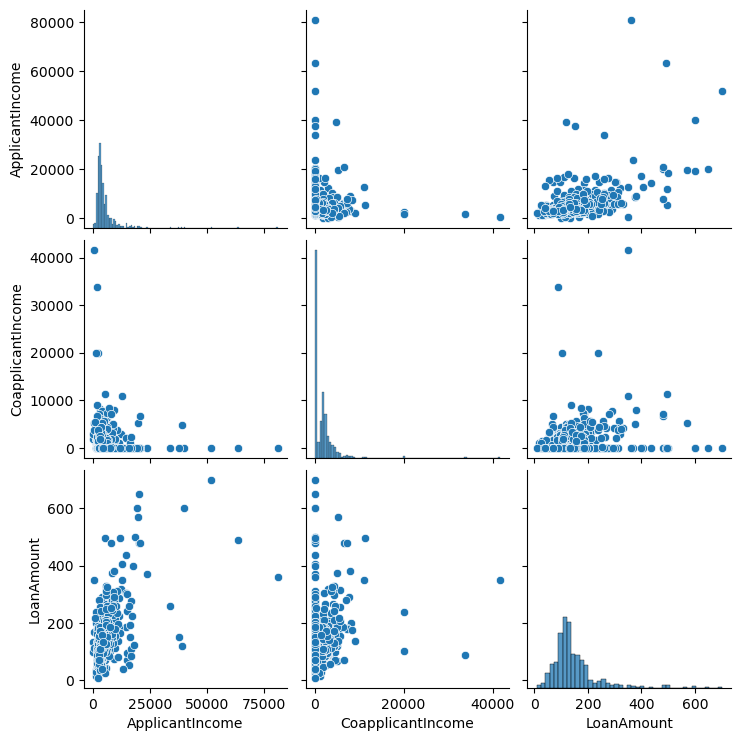

In [35]:
sns.pairplot(data[continous])
plt.show()

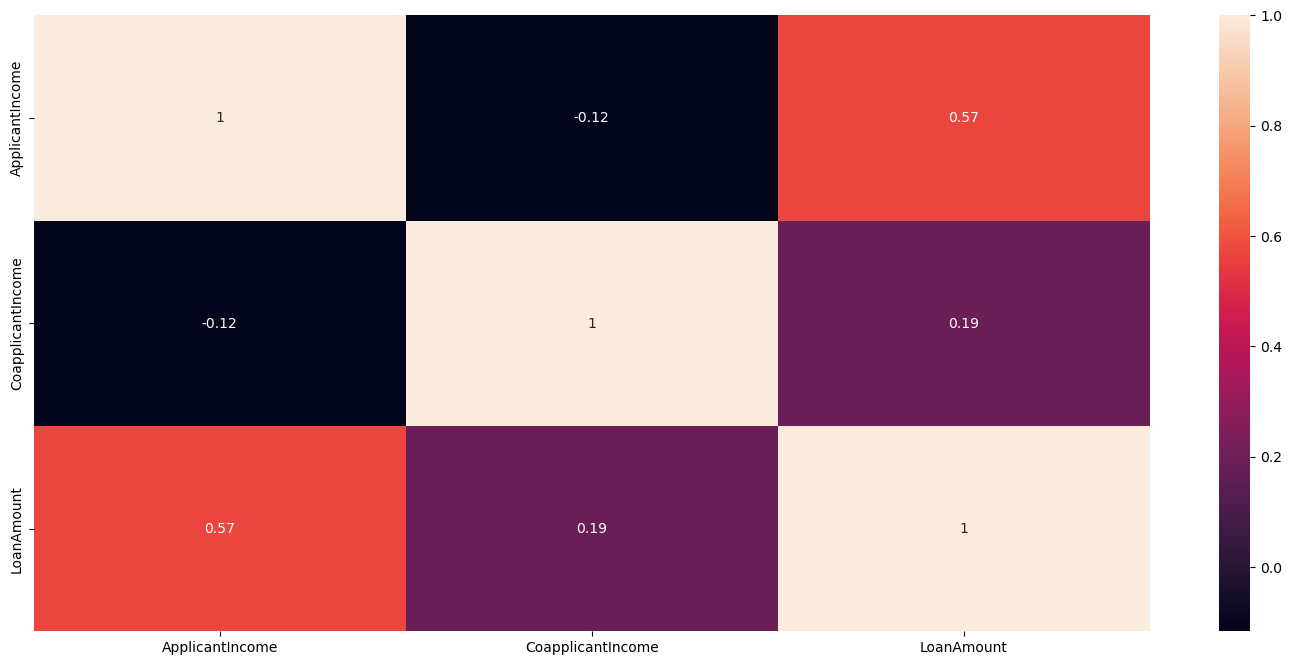

In [36]:
sns.heatmap(data[continous].corr(),annot=True)

plt.show()

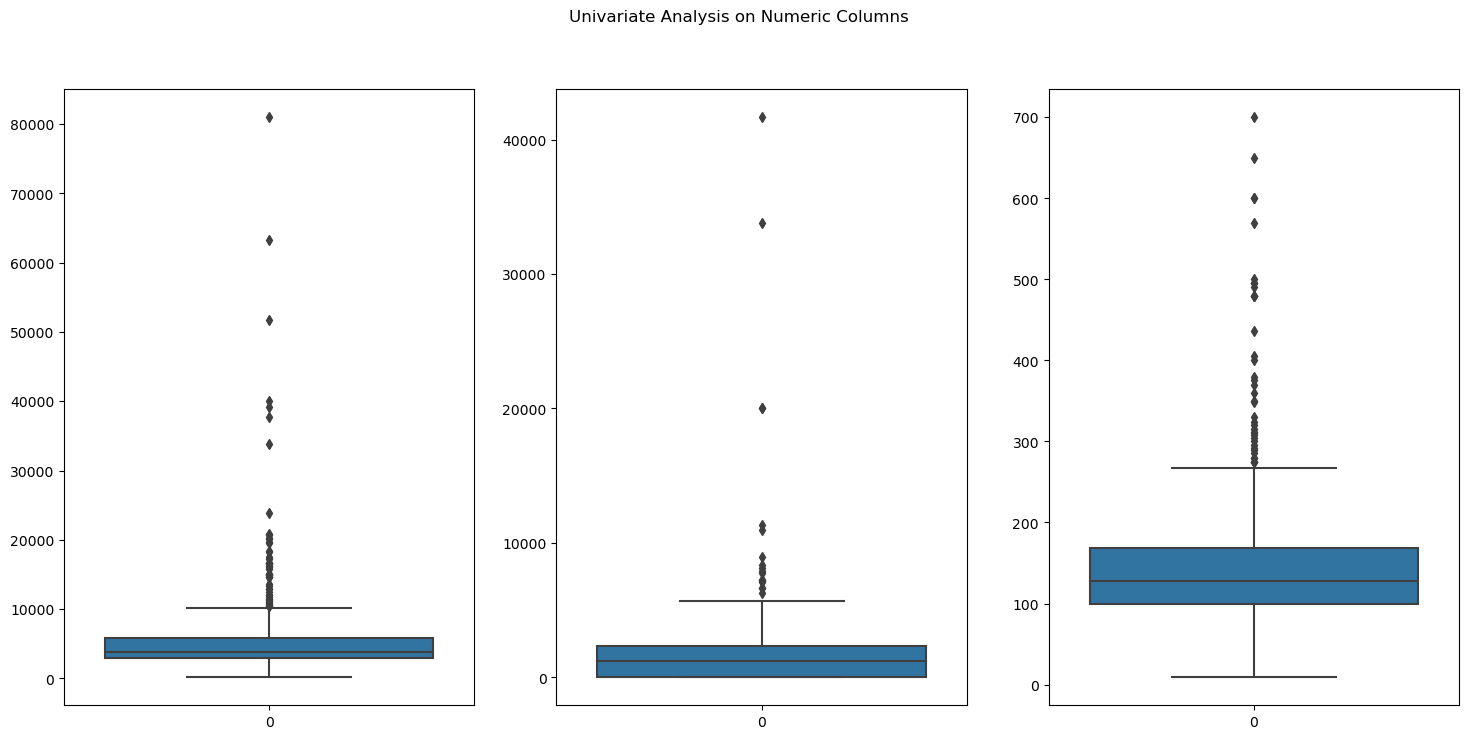

In [37]:
# Lets visualize the outliers using box plot 

plt.rcParams["figure.figsize"] =(18,8)

plt.subplot(1,3,1)
sns.boxplot(data["ApplicantIncome"])

plt.subplot(1,3,2)
sns.boxplot(data["CoapplicantIncome"])

plt.subplot(1,3,3)
sns.boxplot(data["LoanAmount"])

plt.suptitle("Univariate Analysis on Numeric Columns")

plt.show()

In [38]:
data[Discrete_categorical].describe()

,Gender,Married,Education,Self_Employed,Credit_History,Property_Area,Loan_Status
count,601,611,614,582,564,614,614
unique,2,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Good,Semiurban,Y
freq,489,398,480,500,475,233,422


## For Discrete Variable

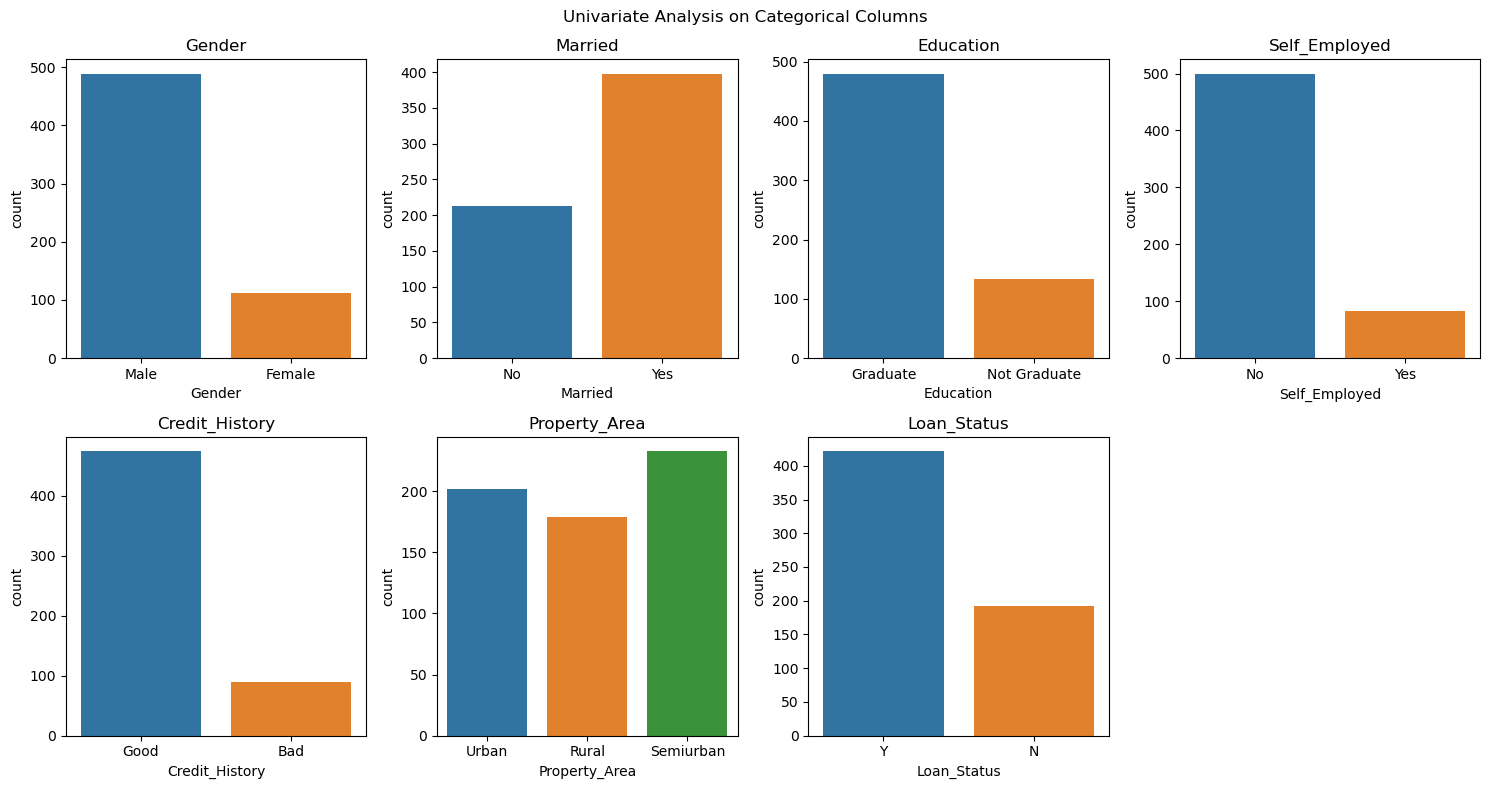

In [39]:
columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

plt.figure(figsize=(15, 8))

for i, col in enumerate(columns):
    plt.subplot(2, 4, i+1)  
    sns.countplot(x=col, data=data)
    plt.title(col)
    
plt.tight_layout()
plt.suptitle("Univariate Analysis on Categorical Columns")
plt.tight_layout()

plt.show()

# Data Preparation

In [40]:
data["Income"]=data["ApplicantIncome"]+data["CoapplicantIncome"]
data.drop(columns=["ApplicantIncome","CoapplicantIncome"],inplace = True)

In [41]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income
0,Male,No,0,Graduate,No,NaN,360.0,Good,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.0,360.0,Good,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.0,360.0,Good,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,120.0,360.0,Good,Urban,Y,4941.0
4,Male,No,0,Graduate,No,141.0,360.0,Good,Urban,Y,6000.0


## Modifiying the wrong data 

In [42]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [43]:
data["Dependents"]=data["Dependents"].replace({"3+":3})

In [44]:
data["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

## Missing Values Treatment 

In [45]:
# Checking Number of missing values 
data.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Income               0
dtype: int64

In [46]:
# Checking percentage of missing values 
data.isnull().sum()/len(data)*100

Gender              2.117264
Married             0.488599
Dependents          2.442997
Education           0.000000
Self_Employed       5.211726
LoanAmount          3.583062
Loan_Amount_Term    2.280130
Credit_History      8.143322
Property_Area       0.000000
Loan_Status         0.000000
Income              0.000000
dtype: float64

In [47]:
data=data.dropna(subset=["Income","LoanAmount","Loan_Amount_Term","Credit_History"])

In [48]:
data["Dependents"]=data["Dependents"].fillna(0)

In [49]:
# Using mode values to impute categorical columns 
data["Gender"]=data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"]=data["Married"].fillna(data["Married"].mode()[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [50]:
data.isnull().sum() # all the missing values had been treated 

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
Income              0
dtype: int64

## Outliers Treatment 

## Encoding

#Got an error for this as Cannot convert non-finite values (NA or inf) to integer for 'GENDER',EDUCATION,MARRIED,

In [51]:
data["Self_Employed"]=data["Self_Employed"].map({"Yes":0,"No":1}).astype("int")
data["Credit_History"]=data["Credit_History"].map({"Good":1,"Bad":0}).astype("int")
data["Property_Area"]=data["Property_Area"].map({"Rural":0,"Semiurban":1,"Urban":2}).astype("int")
data["Loan_Status"]=data["Loan_Status"].map({"Y":0,"N":1}).astype("int")

In [52]:
data["Education"]=data["Education"].fillna(0)
data["Education"] = data["Education"].replace([np.inf, -np.inf], 0)
data["Education"]=data["Education"].map({"Graduate":1,"Not Graduate":0}).astype("int")
data["Education"] = data["Education"].astype("int")

In [53]:
data["Married"]=data["Married"].fillna(0)
data["Married"]=data["Married"].replace([np.inf,-np.inf],0)
data["Married"]=data["Married"].map({"Yes":1,"No":0}).astype("int")
data["Married"] = data["Married"].astype("int")

In [54]:
data["Gender"]=data["Gender"].fillna(0)
data["Gender"]=data["Gender"].replace([np.inf,-np.inf],0)
data["Gender"]=data["Gender"].map({"Male":1,"Female":0}).astype("int")
data["Gender"] = data["Gender"].astype("int")

## Data type conversion

In [55]:
data["Dependents"]=data["Dependents"].astype("int")
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].astype("int")

## Transformers

In [56]:
data[["Income","LoanAmount"]].skew()

Income        5.777628
LoanAmount    2.607945
dtype: float64

In [57]:
# Lets apply boxcox transformation to remove skewness 
from scipy.stats import boxcox
data["Income"],a=boxcox(data["Income"])
data["LoanAmount"],a=boxcox(data["LoanAmount"])

In [58]:
data[["Income","LoanAmount"]].skew()

Income       -0.027769
LoanAmount    0.038289
dtype: float64

In [59]:
data["Loan_Amount_Term"]=data["Loan_Amount_Term"]/12

## X&Y

## Identify the best random state number 

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Separate features (X) and target variable (y)
X = data.drop("Loan_Status", axis=1)  # Features
y = data["Loan_Status"]  # Target variable

# Initialize empty lists to store results
Train = []
Test = []
CV = []

# Perform repeated train-test-split and evaluation
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train the logistic regression model
    log_default = LogisticRegression()
    log_default.fit(X_train, y_train)

    # Make predictions
    ypred_train = log_default.predict(X_train)
    ypred_test = log_default.predict(X_test)

    # Calculate accuracy scores
    Train.append(accuracy_score(y_train, ypred_train))
    Test.append(accuracy_score(y_test, ypred_test))

    # Perform 5-fold cross-validation
    CV.append(cross_val_score(log_default, X_train, y_train, cv=5, scoring="accuracy").mean())

# Create a DataFrame to store results
em = pd.DataFrame({"Train": Train, "Test": Test, "CV": CV})

# Find the best random_state based on CV score
gm=em[(abs(em["Train"]-em["Test"])<=0.05)&(abs(em["Test"]-em["CV"])<=0.05)]
best_rs = em[em["CV"] == em["CV"].max()].index.to_list()[0]
print("Best random_state number:", best_rs)

Best random_state number: 29


## Train-Test split

In [61]:
for i in range(101):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

best_rs = em[em["CV"] == em["CV"].max()].index.to_list()[0]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X, y, test_size=0.2, random_state=best_rs)


# Machine Learning Modeling & Evaluation

## 1.Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(X_train, y_train)

ypred_train = log_model.predict(X_train)
ypred_test = log_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Cross validation score:", cross_val_score(log_model, X_train, y_train, cv=5, scoring="accuracy"))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8014184397163121
Cross validation score: [0.81176471 0.76470588 0.81176471 0.82142857 0.79761905]
Test Accuracy:  0.8679245283018868


## 2. KNN

In [63]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier()
param_grid = {'n_neighbors': list(range(1, 50))}

from sklearn.model_selection import GridSearchCV
knn_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)
knn_grid.fit(X_train, y_train)

knn_model = knn_grid.best_estimator_

ypred_train = knn_model.predict(X_train)
ypred_test = knn_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Cross validation score:", cross_val_score(knn_model, X_train, y_train, cv=5, scoring="accuracy"))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.7683215130023641
Cross validation score: [0.74117647 0.70588235 0.70588235 0.73809524 0.76190476]
Test Accuracy:  0.7264150943396226


In [64]:
knn_grid.best_estimator_

KNeighborsClassifier(n_neighbors=11)

## 3.Support Vector Machine(SVM)

In [65]:
from sklearn.svm import SVC

estimator = SVC()

param_grid = {'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf', 'sigmoid', 'poly']}

from sklearn.model_selection import GridSearchCV

svm_grid = GridSearchCV(estimator, param_grid, scoring='accuracy', cv=5)

svm_grid.fit(X_train, y_train)

svm_model = svm_grid.best_estimator_

ypred_train = svm_model.predict(X_train)
ypred_test = svm_model.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, ypred_train))
print("Cross validation score:", cross_val_score(svm_model, X_train, y_train, cv=5, scoring="accuracy"))
print("Test Accuracy: ", accuracy_score(y_test, ypred_test))

Train Accuracy:  0.8014184397163121
Cross validation score: [0.81176471 0.76470588 0.81176471 0.82142857 0.79761905]
Test Accuracy:  0.8679245283018868


In [66]:
svm_grid.best_estimator_

SVC(C=0.1, kernel='linear')

## 4. Decision Tree Classifier 

In [67]:
from sklearn.tree import DecisionTreeClassifier
estimator = DecisionTreeClassifier(random_state = 70)
param_grid = {'criterion':['gini','entropy'],'max_depth': list(range(1,16))}

from sklearn.model_selection import GridSearchCV
dt_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
dt_grid.fit(X_train,y_train)

dt = dt_grid.best_estimator_

dt_fi = dt.feature_importances_

#Identify the features where the future importance is greater than 0
index = [i for i,x in enumerate(dt_fi) if x > 0]

#Create the new dataset with important features 
X_train_dt = X_train.iloc[:,index]
X_test_dt = X_test.iloc[:,index]

#Train with bestmodel and with important features 
dt.fit(X_train_dt,y_train)

ypred_train = dt.predict(X_train_dt)
ypred_test = dt.predict(X_test_dt)

#Evaluate the best model
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))


Train Accuracy: 0.8226950354609929
Test Accuracy: 0.8301886792452831


## 5.Random Forest Classifier 

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf=42
estimator = RandomForestClassifier(random_state =rf)
param_grid = {"n_estimators": list(range(1,51))}

from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
rf_grid.fit(X_train,y_train)

rf = rf_grid.best_estimator_

rf_fi = rf.feature_importances_

#Identify the features where the future importance is greater than 0
index = [i for i,x in enumerate(rf_fi) if x > 0]

#Create the new dataset with important features 
X_train_rf = X_train.iloc[:,index]
X_test_rf = X_test.iloc[:,index]

#Train with bestmodel and with important features 
rf.fit(X_train_dt,y_train)

ypred_train = rf.predict(X_train_dt)
ypred_test = rf.predict(X_test_dt)

#Evaluate the best model
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

Train Accuracy: 0.9763593380614657
Test Accuracy: 0.7735849056603774


## 6.AdaBoost Classifier

In [69]:
from sklearn.ensemble import AdaBoostClassifier
ac=42
estimator = AdaBoostClassifier(random_state =ac)
param_grid = {"n_estimators": list(range(1,51))}

from sklearn.model_selection import GridSearchCV
ac_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
ac_grid.fit(X_train,y_train)

ac = ac_grid.best_estimator_

ac_fi = ac.feature_importances_

#Identify the features where the future importance is greater than 0
index = [i for i,x in enumerate(ac_fi) if x > 0]

#Create the new dataset with important features 
X_train_ac = X_train.iloc[:,index]
X_test_ac = X_test.iloc[:,index]

#Train with bestmodel and with important features 
ac.fit(X_train_dt,y_train)

ypred_train = ac.predict(X_train_dt)
ypred_test = ac.predict(X_test_dt)

#Evaluate the best model
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8297872340425532
Test Accuracy: 0.8490566037735849


## 7. Gradient Boosting Classifier

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb=42
estimator = GradientBoostingClassifier(random_state =gb)
param_grid = {"n_estimators": list(range(1,51))}

from sklearn.model_selection import GridSearchCV
gb_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
gb_grid.fit(X_train,y_train)

gb = gb_grid.best_estimator_

gb_fi = gb.feature_importances_

#Identify the features where the future importance is greater than 0
index = [i for i,x in enumerate(gb_fi) if x > 0]

#Create the new dataset with important features 
X_train_gb = X_train.iloc[:,index]
X_test_gb = X_test.iloc[:,index]

#Train with bestmodel and with important features 
gb.fit(X_train_gb,y_train)

ypred_train = gb.predict(X_train_gb)
ypred_test = gb.predict(X_test_gb)

#Evaluate the best model
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8297872340425532
Test Accuracy: 0.8113207547169812


## 8.XGBoost Classifier

In [83]:
from xgboost import XGBClassifier
xgb=45
estimator = XGBClassifier(random_state=xgb)
param_grid = {"n_estimators":[10,20,30,40,100],"max_depth":[3,4,5],"gamma":[0,0.15,0.3,0.5,1]}

from sklearn.model_selection import GridSearchCV
xgb_grid = GridSearchCV(estimator,param_grid,scoring = 'accuracy',cv = 5)
xgb_grid.fit(X_train,y_train)

xgb = xgb_grid.best_estimator_

xgb_fi = xgb.feature_importances_

#Identify the features where the future importance is greater than 0
index = [i for i,x in enumerate(xgb_fi) if x > 0]

#Create the new dataset with important features 
X_train_xgb = X_train.iloc[:,index]
X_test_xgb = X_test.iloc[:,index]

#Train with bestmodel and with important features 
xgb.fit(X_train_xgb,y_train)

ypred_train = xgb.predict(X_train_xgb)
ypred_test = xgb.predict(X_test_xgb)

#Evaluate the best model
print('Train Accuracy:', accuracy_score(y_train,ypred_train))
print('Test Accuracy:', accuracy_score(y_test,ypred_test))

Train Accuracy: 0.8676122931442081
Test Accuracy: 0.8490566037735849
